In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, precision_recall_curve,
                             confusion_matrix, classification_report)
from sklearn.datasets import make_classification
import seaborn as sns

In [2]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Dataset shape:", X.shape)
print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])
print("\nClass distribution (test):")
print(pd.Series(y_test).value_counts())

Dataset shape: (1000, 20)
Train size: 800
Test size: 200

Class distribution (test):
0    106
1     94
Name: count, dtype: int64


In [3]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("--- Model Evaluation Metrics ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC:  {roc_auc:.4f}")

--- Model Evaluation Metrics ---
Accuracy:  0.8250
Precision: 0.8172
Recall:    0.8085
F1 Score: 0.8128
ROC AUC:  0.9137


--- Confusion Matrix ---
[[89 17]
 [18 76]]


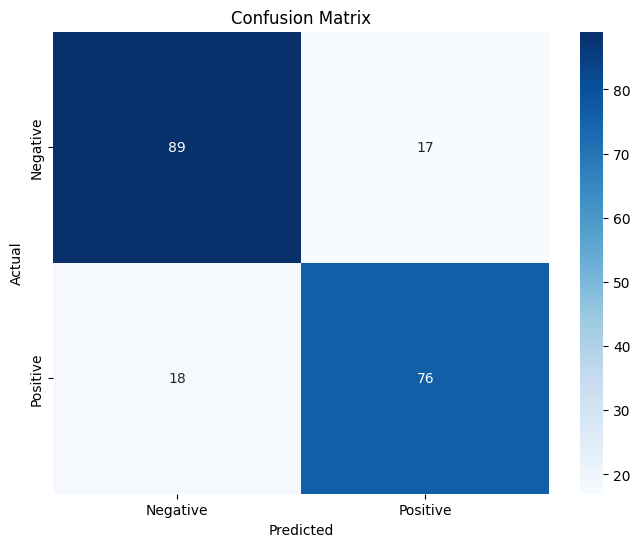


True Negatives: 89
False Positives: 17
False Negatives: 18
True Positives: 76


In [4]:
print("--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"\nTrue Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

In [5]:
print("--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.83      0.84      0.84       106
    Positive       0.82      0.81      0.81        94

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



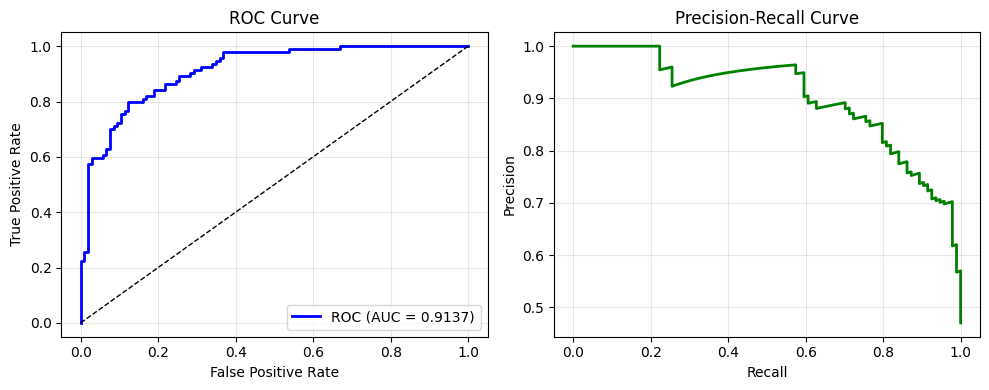

In [6]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, 'b-', linewidth=2, label=f'ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, alpha=0.3)

precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob)

plt.subplot(1, 2, 2)
plt.plot(recall_curve, precision_curve, 'g-', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()